# **Dataset's**

In [1]:
!git clone https://github.com/Meghana3015/ML-Dataset.git
!mkdir -p datasets
!mv ML-Dataset/* datasets/
!rm -rf ML-Dataset
!ls datasets
!mv /content/datasets/ML\ Lab\ Exercise\ 9\ Dataset /content/datasets/data

Cloning into 'ML-Dataset'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 36 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 230.81 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (7/7), done.
'co2_emission_train - Regression.csv'   ML_Lab.ipynb	   weather_data.csv
'ML Lab Exercise 9 Dataset'	        Product_Data.csv


In [27]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
db_path = 'co2-emission-data.db'
conn = sqlite3.connect(db_path)
query = "SELECT * FROM co2_emission_data"
df = pd.read_sql_query(query, conn)
conn.close()
csv_file_path = 'extracted_data.csv'
df.to_csv(csv_file_path, index=False)
df_csv = pd.read_csv(csv_file_path)
print("First 5 rows of data from CSV file")
print(df_csv.head(5))
train_data, test_data = train_test_split(df_csv, test_size=0.2)
print("Training data")
print(train_data.head(5))
print("Testing data")
print(test_data.head(5))

DatabaseError: Execution failed on sql 'SELECT * FROM co2_emission_data': no such table: co2_emission_data

# **DB Connect**

In [ ]:
 import sqlite3
 import pandas as pd
 # Load the CSV file into a pandas DataFrame
 csv_file_path = '/content/datasets/co2_emission_train - Regression.csv'
 data = pd.read_csv(csv_file_path)
 # Connect to the SQLite database (or create it if it doesn't exist)
 db_path = 'co2-emission-data.db'
 conn = sqlite3.connect(db_path)
 cursor = conn.cursor()
 # Create the table
 cursor.execute('''
 CREATE TABLE IF NOT EXISTS co2_emission_data (
 Engine_Size_liters REAL,
 Cylinders_count INTEGER,
 Fuel_Consumption_liters_per_100km REAL,
 Vehicle_Weight_kg INTEGER,
 Horsepower_hp INTEGER,
 Age_years INTEGER,
 CO2_Emissions_g_per_km REAL
 )
 ''')
 for index, row in data.iterrows():
     cursor.execute('''
     INSERT INTO co2_emission_data (
     Engine_Size_liters,
     Cylinders_count,
     Fuel_Consumption_liters_per_100km,
     Vehicle_Weight_kg,
     Horsepower_hp,
     Age_years,
     CO2_Emissions_g_per_km
     ) VALUES (?, ?, ?, ?, ?, ?, ?)
     ''', (row['Engine_Size (liters)'], # Use actual column name
row['Cylinders (count)'],
 # Use actual column name
 row['Fuel_Consumption (liters/100km)'], # Use actual column name
 row['Vehicle_Weight (kg)'], # Use actual column name
 row['Horsepower (hp)'],
 row['Age (years)'],
 # Use actual column name
 # Use actual column name
 row['CO2_Emissions (g/km)'])) # Use actual column name
 # Commit the transaction and close the connection
 conn.commit()
 conn.close()
 print(f"Data from {csv_file_path} has been successfully inserted into {db_path}.")

Data from /content/datasets/co2_emission_train - Regression.csv has been successfully inserted into co2-emission-data.db.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
db_path = 'co2-emission-data.db'
conn = sqlite3.connect(db_path)
query = "SELECT * FROM co2_emission_data"
df = pd.read_sql_query(query, conn)
conn.close()
csv_file_path = 'extracted_data.csv'
df.to_csv(csv_file_path, index=False)
df_csv = pd.read_csv(csv_file_path)
print("First 5 rows of data from CSV file")
print(df_csv.head(5))
train_data, test_data = train_test_split(df_csv, test_size=0.2, random_state=42)
print("Training data")
print(train_data.head(5))
print("Testing data")
print(test_data.head(5))

First 5 rows of data from CSV file
   Engine_Size_liters  Cylinders_count  ...  Age_years  CO2_Emissions_g_per_km
0                 4.0                3  ...          3                  412.95
1                 5.0               11  ...         12                  444.85
2                 3.0                9  ...         16                  543.75
3                 5.0               11  ...         19                  410.85
4                 5.0               10  ...          5                  550.80

[5 rows x 7 columns]
Training data
    Engine_Size_liters  Cylinders_count  ...  Age_years  CO2_Emissions_g_per_km
34                 6.0                3  ...          3                  413.05
53                 1.0                7  ...         18                  332.25
43                 3.0                6  ...          1                  375.85
38                 4.0               11  ...         11                  397.70
8                  3.0                5  ...         17

# **Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Load the dataset from a CSV file
data = pd.read_csv("/content/datasets/Product_Data.csv")
# Separate the features (X) and target (y)
X = data[['Product Price (INR)', 'Product Quality (1 to 10)', 'Discount (%)','Store Visibility (1 to 10)', 'Seasonality (1 for seasonal, 0 for not)']]
y = data['Sales (INR)']
# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Initialize the Linear Regression model
model = LinearRegression()
# Perform 10-fold cross-validation using R² score
cv_scores_r2 = cross_val_score(model, X_scaled, y, cv=10, scoring='r2')
# Perform 10-fold cross-validation using MSE (negative MSE because cross_val_score minimizes it)
cv_scores_mse = cross_val_score(model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
# Calculate mean cross-validation R² and MSE
mean_cv_r2 = cv_scores_r2.mean()
mean_cv_mse =-cv_scores_mse.mean() # Negate MSE to get positive values
# Output performance metrics
print(f"Mean Cross-Validation R² (10-Fold): {mean_cv_r2}")
print(f"Mean Cross-Validation MSE (10-Fold): {mean_cv_mse}")
# Function to prompt user input and predict sales
def predict_sales(model, scaler):
    try:
        # Collect user inputs for each feature
        product_price = float(input("Enter the product price in INR: "))
        product_quality = int(input("Enter the product quality (1 to 10): "))
        discount = int(input("Enter the discount percentage (0 to 50): "))
        store_visibility = int(input("Enter the store visibility (1 to 10): "))
        seasonality = int(input("Is the product seasonal? (1 for Yes, 0 for No):"))
        # Create a DataFrame for the input data
        user_input = pd.DataFrame({
            'Product Price (INR)': [product_price],
            'Product Quality (1 to 10)': [product_quality],
            'Discount (%)': [discount],
            'Store Visibility (1 to 10)': [store_visibility],
            'Seasonality (1 for seasonal, 0 for not)': [seasonality]
        })
        # Standardize the input data using the same scaler used for training
        user_input_scaled = scaler.transform(user_input)
# Train the model on the entire dataset before making predictions
        model.fit(X_scaled, y)
# Predict sales
        predicted_sales = model.predict(user_input_scaled)[0]
# Print the predicted sales
        print(f"Predicted Sales (INR): {predicted_sales:.2f}")
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter the correct values.")
# Call the function to prompt
predict_sales(model, scaler)

Mean Cross-Validation R² (10-Fold): 0.9925374520121467
Mean Cross-Validation MSE (10-Fold): 86290.65526550889
Enter the product price in INR: 100
Enter the product quality (1 to 10): 1
Enter the discount percentage (0 to 50): 1
Enter the store visibility (1 to 10): 1
Is the product seasonal? (1 for Yes, 0 for No):0
Predicted Sales (INR): 1573.31


# **KNN**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
 # Load the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target # Labels
# Create the k-NN model (with k=5)
knn = KNeighborsClassifier(n_neighbors=5)
# Perform cross-validation and make predictions on all folds
y_pred = cross_val_predict(knn, X, y, cv=10) # 10-fold cross-validation
# Evaluate model using accuracy score and confusion matrix
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
# Print accuracy and confusion matrix
print(f"Cross-Validation Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
correct = 0
wrong = 0
# Compare actual vs predicted for some data points
for i in range(len(y)):
    if y[i] == y_pred[i]:
        correct += 1
    else:
        wrong += 1
# Summary of correct and wrong predictions

print(f"\nTotal correct predictions: {correct}")
print(f"Total wrong predictions: {wrong}")

Cross-Validation Accuracy: 96.67%

Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]

Total correct predictions: 145
Total wrong predictions: 5


# **KMeans**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
points=np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
initial_centers=np.array([[2,10],[5,8],[1,2]])
KMeans=KMeans(n_clusters=3,init=initial_centers,n_init=1,random_state=42)
KMeans.fit(points)
cluster_centers=KMeans.cluster_centers_
labels=KMeans.labels_
print("Cluster centers:\n",cluster_centers)
print("Cluster labels:\n",labels)

Cluster centers:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
Cluster labels:
 [0 2 1 0 1 1 2 0]


# **SVM**

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC as svc
iris=datasets.load_iris()
x=iris.data
y=iris.target
svm_model=svc(kernel='linear', random_state=42)
y_pred=cross_val_predict(svm_model,x,y,cv=5)
y_pred
accuracy=accuracy_score(y,y_pred)
accuracy
print("Accuracy:",accuracy)
CM=confusion_matrix(y,y_pred)
CM
print("Confusion Matrix:\n",CM)
cmdf=pd.DataFrame(CM,index=iris.target_names,columns=iris.target_names)
print("\nConfusion Matrix DataFrame:\n",cmdf)

Accuracy: 0.98
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]

Confusion Matrix DataFrame:
             setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          48          2
virginica        0           1         49


# **ID3**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
df=pd.read_csv('/content/datasets/weather_data.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Cool,High,False,No
1,Rain,Cool,High,True,Yes
2,Rain,Cool,High,False,No
3,Overcast,Mild,High,False,No
4,Sunny,Cool,Normal,True,No
...,...,...,...,...,...
95,Rain,Hot,Normal,True,No
96,Overcast,Mild,High,False,Yes
97,Overcast,Mild,Normal,False,No
98,Rain,Cool,Normal,True,No


In [ ]:
X=df[['outlook','temperature','humidity','windy']]  # Use the new encoded column names
y=df['play']

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['outlook']=label_encoder.fit_transform(df['Outlook'])
df['temperature']=label_encoder.fit_transform(df['Temperature'])
df['humidity']=label_encoder.fit_transform(df['Humidity'])
df['windy']=df['Windy'].astype(int)
df['play']=label_encoder.fit_transform(df['Play'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X_train,y_train)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

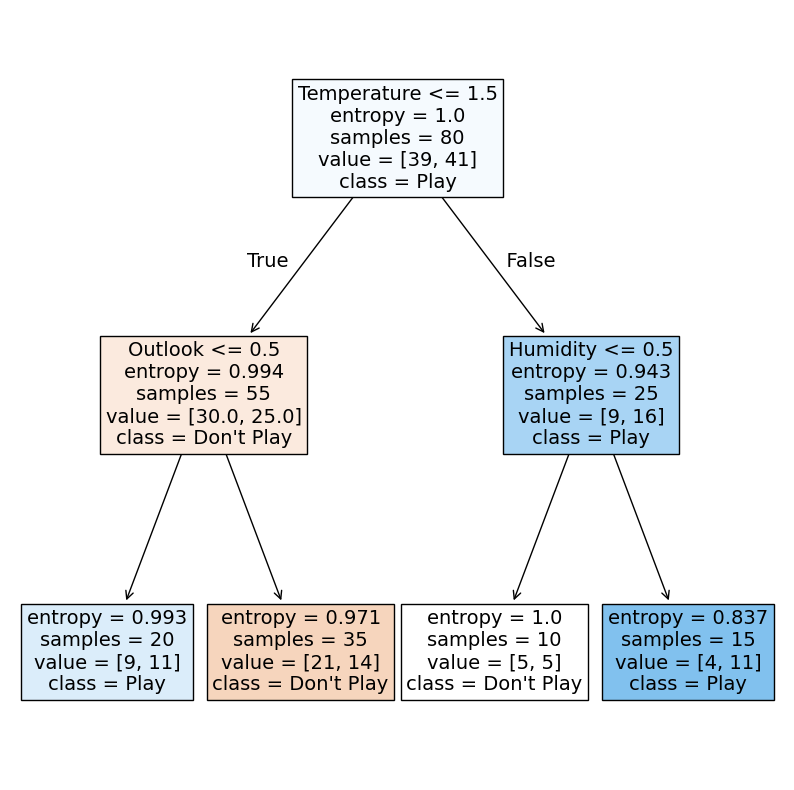

In [ ]:
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'],  # Use plot_tree instead of plt_tree
          class_names=['Don\'t Play', 'Play'], filled=True, fontsize=14)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)
accauracy=clf.score(X_test,y_pred)
print(f'\n Model Accauracy:{accauracy *100:.2f}%')


 Model Accauracy:100.00%


In [ ]:
print("\n Please enter the details of the new sample for classification :")
outlook=int(input("outlook(sunny=2,overcast=0,rain=1)  =  "))
temperature=int(input("temperature(hot=1,mild=2,cool=0)  =  "))
humidity=int(input("humidity(normal=0,high=1)  =  "))
windy=int(input("windy(false=0,true=1)  =  "))
new=[[outlook,temperature,humidity,windy]]
prediction=clf.predict(new)
print("\nPrediction for new data:",'play'if prediction[0]==1 else 'don\'t play')


 Please enter the details of the new sample for classification :
outlook(sunny=2,overcast=0,rain=1)  =  0
temperature(hot=1,mild=2,cool=0)  =  0
humidity(normal=0,high=1)  =  1
windy(false=0,true=1)  =  0

Prediction for new data: play


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **Naive Bayesian**

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load text files from the folder and assign category labels
def load_documents(folder_path="/content/datasets/data"): # Modified folder_path
    documents = []
    labels = []
    # Iterate through the folder, assuming folder structure is like
    # →'category1', 'category2', etc.
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path) and category != '.ipynb_checkpoints':
            # Skip .ipynb_checkpoints
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                # Only process text files
                if file_name.endswith('.txt'):
                    with open(file_path, 'r', encoding='utf-8') as file:
                        # Read the document and strip out unnecessary
                        # →whitespaces and newlines
                        content = file.read().strip()
                        documents.append(content)  # Load cleaned document
                        # →content
                        labels.append(category)  # Assign category as the label
    return documents, labels

# Step 2: Define folder path (where your documents are stored)
# folder_path = os.path.join(os.getcwd())  # Use current working directory -- Removed this line
folder_path = "/content/datasets/data" # Updated folder_path

# Load documents and their labels
documents, labels = load_documents(folder_path)

# Step 3: Create a DataFrame with two columns: Content and Category
df = pd.DataFrame({
    'Content': documents,
    'Category': labels
})
print(df)

# Step 4: Apply TF-IDF Vectorization to the document contents
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(df['Content'])  # Transform text data into TF-IDF features

# Convert the TF-IDF matrix into a DataFrame for easy handling
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Step 5: Add the labels to the TF-IDF DataFrame
tfidf_df['Category'] = labels

                                              Content    Category
0   The Internet of Things (IoT) is a rapidly adva...  Technology
1   Machine learning is a rapidly evolving field i...  Technology
2   Blockchain is a revolutionary technology that ...  Technology
3   Python is a versatile and powerful programming...  Technology
4   Data science is a multidisciplinary field that...  Technology
5   Cricket is a globally popular sport known for ...      Sports
6   Football, often referred to as "the beautiful ...      Sports
7   Basketball is a fast-paced and highly popular ...      Sports
8   Playing sports is a crucial component of a hea...      Sports
9   Tennis is a widely celebrated sport known for ...      Sports
10  Drinking water is fundamental to maintaining h...      Health
11  A balanced diet is essential for maintaining o...      Health
12  Getting enough sleep is crucial for overall he...      Health
13  Managing stress is essential for maintaining b...      Health
14  Regula

In [ ]:
# Optional: Save the TF-IDF DataFrame to a CSV file
csv_file_path = 'documents_with_tfidf_features.csv'
tfidf_df.to_csv(csv_file_path, index=False)
print(f"CSV file successfully created with TF-IDF features: {csv_file_path}")
print(tfidf_df)


CSV file successfully created with TF-IDF features: documents_with_tfidf_features.csv
     ability  academic    access  accuracy  ...   working     world  worldwide    Category
0   0.000000  0.000000  0.020950  0.000000  ...  0.000000  0.031038   0.000000  Technology
1   0.000000  0.000000  0.000000  0.081491  ...  0.000000  0.000000   0.000000  Technology
2   0.000000  0.000000  0.050661  0.000000  ...  0.000000  0.000000   0.000000  Technology
3   0.000000  0.028808  0.000000  0.000000  ...  0.000000  0.000000   0.000000  Technology
4   0.039321  0.000000  0.000000  0.018004  ...  0.021689  0.018004   0.000000  Technology
5   0.000000  0.000000  0.000000  0.023905  ...  0.000000  0.000000   0.000000      Sports
6   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.025579   0.061631      Sports
7   0.025986  0.000000  0.000000  0.047592  ...  0.000000  0.047592   0.028667      Sports
8   0.032588  0.071899  0.000000  0.000000  ...  0.000000  0.000000   0.000000      Sports
9   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Load the TF-IDF DataFrame (assuming 'documents_with_tfidf_features.csv' was␣
# →created previously)
df = pd.read_csv('documents_with_tfidf_features.csv')
# Separate features (X) and labels (y)
X = df.drop('Category', axis=1)
y = df['Category']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()
# Fit the model to the training data
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


# **Dimensionality Reduction**

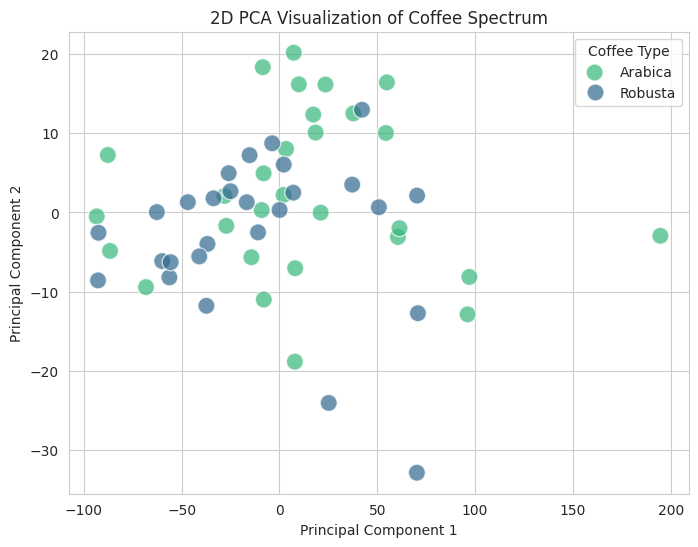


Running model: SVM
Confusion Matrix:
 [[20  7]
 [ 4 25]]

Evaluation Results:
  Method  Accuracy  Precision  Recall  F1-Score   MCC
0    SVM       0.8        0.8     0.8       0.8  0.61


In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, matthews_corrcoef, accuracy_score

# Load dataset
data = pd.read_csv("ML_FTIR_instant_coffee.csv")
X = data.drop('type', axis=1)
y = data['type']

# Step 1: Perform PCA for 2D Visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Creating a DataFrame for 2D PCA visualization
pca_2d_data = np.vstack((X_pca_2d.T, y)).T
df_pca_2d = pd.DataFrame(data=pca_2d_data, columns=("Dimension_1", "Dimension_2", "Target"))

# Plotting the 2D PCA result
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_2d, x='Dimension_1', y='Dimension_2', hue='Target', palette='viridis', s=150, alpha=0.7)
plt.title("2D PCA Visualization of Coffee Spectrum")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Coffee Type", labels=['Arabica', 'Robusta'])
plt.show()

# Step 2: Perform PCA for SVM Classification with 10 Dimensions
pca_10d = PCA(n_components=10)
X_pca_10d = pca_10d.fit_transform(X)

# Define classifier models
models = []
models.append(('SVM', SVC(kernel='rbf', random_state=7)))

# Prepare results storage
algo_result = []

# Run cross-validation and evaluation metrics
for name, model in models:
    # Initialize 10-fold cross-validation
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    print(f"\nRunning model: {name}")
    y_pred = cross_val_predict(model, X_pca_10d, y, cv=kfold)

    # Calculate metrics
    CM = confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n", CM)

    Accuracy = np.round_(accuracy_score(y, y_pred), decimals=2)
    PRFS = precision_recall_fscore_support(y, y_pred, average='micro')
    Precision = round(PRFS[0], 2)
    Recall = round(PRFS[1], 2)
    F1_Score = round(PRFS[2], 2)
    MCC = np.round_(matthews_corrcoef(y, y_pred), decimals=2)

    # Append results
    temp_result = [name, Accuracy, Precision, Recall, F1_Score, MCC]
    algo_result.append(temp_result)

# Create a DataFrame to display results
ml_pca_df_10d = pd.DataFrame(algo_result, columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'MCC'])
print("\nEvaluation Results:")
print(ml_pca_df_10d)

# **Recommender System**

In [ ]:
import pandas as pd
import numpy as np # Corrected the indentation
from sklearn.decomposition import TruncatedSVD
# Step 1: Create a synthetic dataset (User-Item ratings)
data = {
    'User': ['User1', 'User2', 'User3', 'User4', 'User5'],
    'Item1': [5, 3, 4, np.nan, 2],
    'Item2': [3, 2, 4, 4, 5],
    'Item3': [4, 4, 3, 2, np.nan],
    'Item4': [2, 5, 3, 4, 1],
    'Item5': [3, 4, np.nan, 5, 4],
    'Item6': [5, 4, 2, 3, 4],
}
# Create a DataFrame
df = pd.DataFrame(data)
# Step 2: Handle missing values- Fill missing values with 0 (indicating no rating)
df_filled = df.fillna(0) # Define df_filled before using it
# Step 3: Set User column as the index
df_filled.set_index('User', inplace=True) # Now you can use df_filled
# Step 4: Mean center the ratings (subtract user mean)
user_means = df_filled.mean(axis=1)  # Calculate the mean rating for each user
df_centered = df_filled.sub(user_means, axis=0)  # Subtract user mean from each user's ratings
# Step 5: Apply Singular Value Decomposition (SVD) on the centered data
svd = TruncatedSVD(n_components=2)  # Set the number of latent factors (components)
U = svd.fit_transform(df_centered)  # User feature matrix
Sigma = np.diag(svd.singular_values_)  # Singular values (diagonal matrix)
Vt = svd.components_  # Item feature matrix

# Step 6: Reconstruct the matrix using the SVD components
reconstructed_matrix = np.dot(np.dot(U, Sigma), Vt)
# Step 7: Add back the mean ratings to reconstruct the original scale
reconstructed_matrix_with_mean = reconstructed_matrix + user_means.values[:, np.newaxis]
# Create a DataFrame for the reconstructed ratings with the added mean
reconstructed_df = pd.DataFrame(reconstructed_matrix_with_mean, columns=df_filled.columns, index=df_filled.index)
print("\nReconstructed Ratings Matrix (after SVD, with added mean):")
print(reconstructed_df)


Reconstructed Ratings Matrix (after SVD, with added mean):
           Item1      Item2     Item3     Item4      Item5     Item6
User                                                                
User1  10.409302   4.824364  4.726916 -0.086580  -2.096509  4.222507
User2   0.434367  -0.987566  6.725279  8.879981   5.377260  1.570678
User3  11.922851   1.903255  6.169294 -0.526296  -5.848801  2.379697
User4 -10.970898   6.223370 -4.088850  6.094396  16.384490  4.357492
User5  -3.050503  14.720267 -9.574655 -5.007330  10.899138  8.013084


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min-Max scaling to bring the reconstructed values to the range [1, 5]
scaler = MinMaxScaler(feature_range=(1, 5)) # Removed extra space before this line
reconstructed_df_scaled = pd.DataFrame(scaler.fit_transform(reconstructed_df),
                                       columns=reconstructed_df.columns, index=reconstructed_df.index)
print("\nReconstructed Ratings Matrix (after Min-Max Scaling):")
print(reconstructed_df_scaled)
# Step 6: Recommend items for a user based on predicted ratings
def recommend_items(user, reconstructed_df, n_recommendations=3):
    # Get the user's predicted ratings
    user_ratings = reconstructed_df.loc[user]
    # Sort the ratings in descending order and recommend the top n items
    recommended_items = user_ratings.sort_values(ascending=False).head(n_recommendations) # Fixed line continuation
    return recommended_items
# Step 7: Get recommendations for a specific user (e.g., User1)
user_to_recommend = 'User5'
recommended_items = recommend_items(user_to_recommend, reconstructed_df_scaled)
print(f"\nRecommended items for {user_to_recommend}:")
print(recommended_items)



Reconstructed Ratings Matrix (after Min-Max Scaling):
          Item1     Item2     Item3     Item4     Item5     Item6
User                                                             
User1  4.735552  2.480008  4.509602  2.417337  1.675076  2.646484
User2  2.992730  1.000000  5.000000  5.000000  3.019685  1.000000
User3  5.000000  1.736148  4.863561  2.290684  1.000000  1.502308
User4  1.000000  2.836265  2.346215  4.197660  5.000000  2.730294
User5  2.383853  5.000000  1.000000  1.000000  4.013128  5.000000

Recommended items for User5:
Item2    5.000000
Item6    5.000000
Item5    4.013128
Name: User5, dtype: float64


# **New Codes**

In [28]:
import pandas as pd

# Load data from a CSV file without connecting to a database
csv_file_path = 'Product_Data.csv'
df_csv = pd.read_csv(csv_file_path)

# Display the first 5 rows of the CSV data
print("First 5 rows of data from CSV file:")
print(df_csv.head())

# If needed, you can perform further operations like splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_csv, test_size=0.2)

# Display training and testing data
print("Training data:")
print(train_data)
print("Testing data:")
print(test_data)

First 5 rows of data from CSV file:
   Unnamed: 0  Product Price (INR)  Product Quality (1 to 10)  Discount (%)  \
0           0                  960                          3            35   
1           1                 3872                          8            18   
2           2                 3192                          6            25   
3           3                  566                          3             2   
4           4                 4526                          1            18   

   Store Visibility (1 to 10)  Seasonality (1 for seasonal, 0 for not)  \
0                           1                                        1   
1                           5                                        0   
2                           3                                        0   
3                           4                                        0   
4                           3                                        1   

   Sales (INR)  
0         8992  
1        1

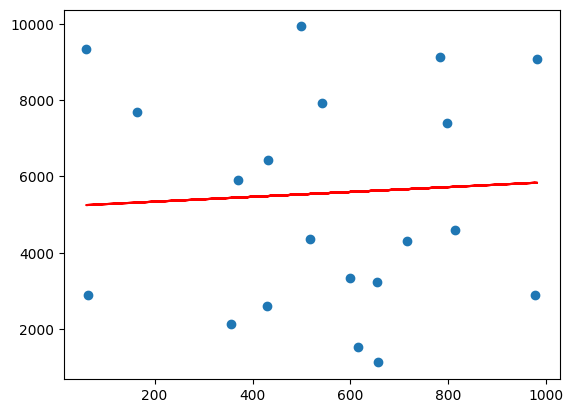

Accuracy: -1.79%


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dataset and model in one step
df = pd.DataFrame({'Advertising': np.random.rand(100) * 1000, 'Sales': np.random.rand(100) * 10000})
X_train, X_test, y_train, y_test = train_test_split(df[['Advertising']], df['Sales'], test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Plot and accuracy
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')
plt.show()
print(f'Accuracy: {model.score(X_test, y_test) * 100:.2f}%')


First 5 rows of data:
   Unnamed: 0  Product Price (INR)  Product Quality (1 to 10)  Discount (%)  \
0           0                  960                          3            35   
1           1                 3872                          8            18   
2           2                 3192                          6            25   
3           3                  566                          3             2   
4           4                 4526                          1            18   

   Store Visibility (1 to 10)  Seasonality (1 for seasonal, 0 for not)  \
0                           1                                        1   
1                           5                                        0   
2                           3                                        0   
3                           4                                        0   
4                           3                                        1   

   Sales (INR)  
0         8992  
1        11871  
2      

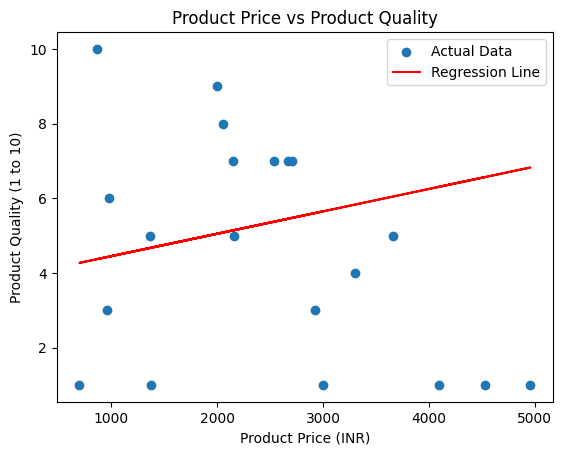

Model Accuracy: -31.13%


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data from the CSV file
csv_file_path = 'Product_Data.csv'
df = pd.read_csv(csv_file_path)

# Ensure data is clean and usable
print("First 5 rows of data:")
print(df.head())

# Split the dataset into features (X) and target (y)
X = df[['Product Price (INR)']]
y = df['Product Quality (1 to 10)']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the test data and regression line
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, model.predict(X_test), 'r', label='Regression Line')
plt.xlabel('Product Price (INR)')
plt.ylabel('Product Quality (1 to 10)')
plt.title('Product Price vs Product Quality')
plt.legend()
plt.show()

# Print the accuracy of the model
accuracy = model.score(X_test, y_test) * 100
print(f'Model Accuracy: {accuracy:.2f}%')


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load, split, train and predict
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)

# Output results
print(classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load data, split, train and predict
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = SVC(kernel='linear').fit(X_train, y_train).predict(X_test)

# Output results
print(classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


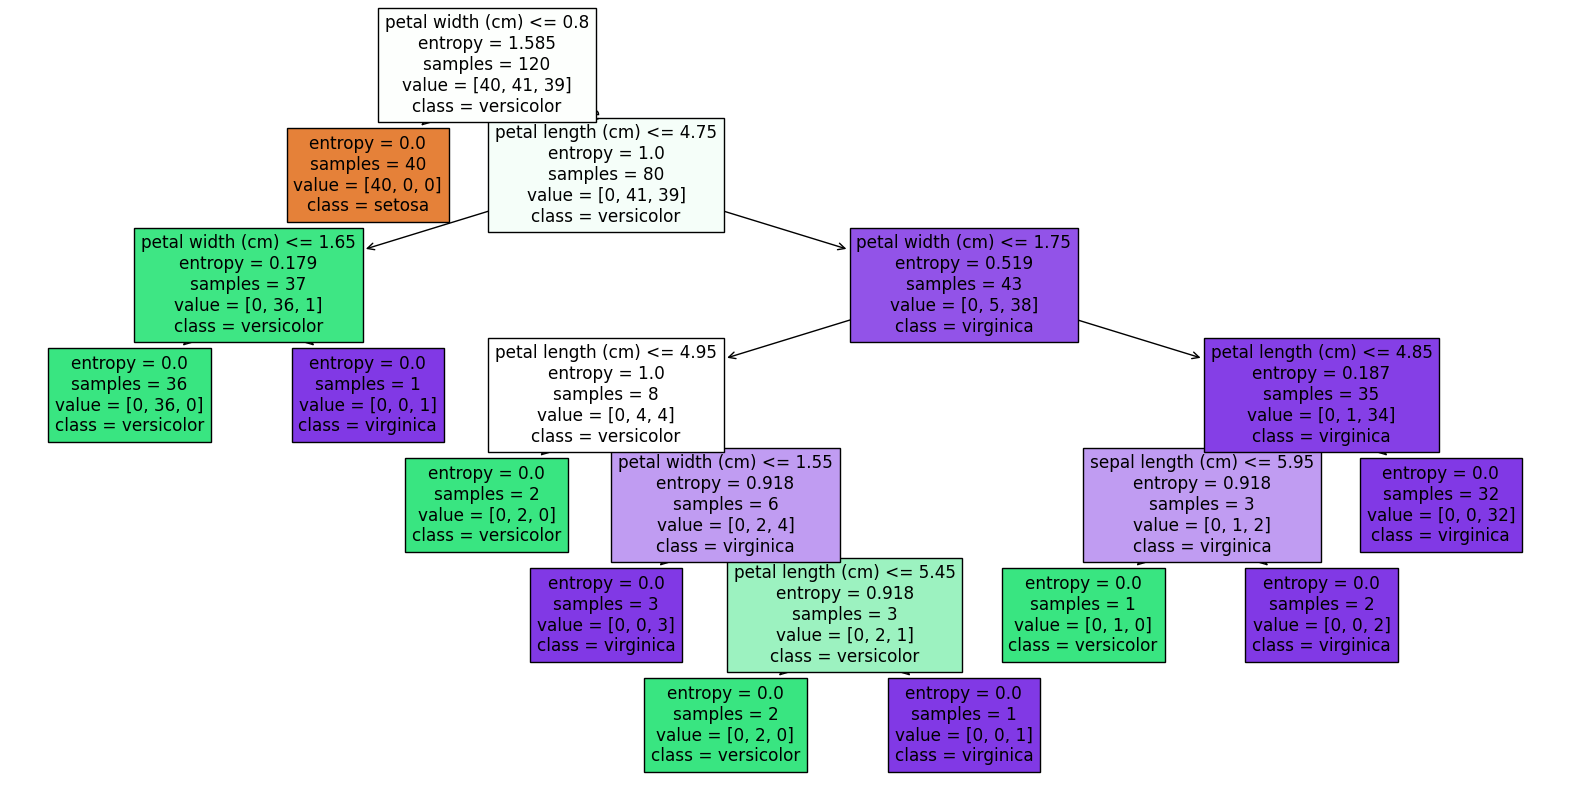

Predicted class for the new sample: setosa


In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load and split data, train model, predict
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Output results
print(classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()

# Predict class for new sample
print(f'Predicted class for the new sample: {load_iris().target_names[clf.predict([[5.0, 3.6, 1.4, 0.2]])][0]}')



In [51]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Dataset
documents = ["I love programming in Python", "Python is great for data science",
             "I enjoy machine learning", "Machine learning is fascinating",
             "Data science and machine learning are related", "I love data science",
             "Programming in Python is fun", "Data analysis is an important skill",
             "I enjoy programming and data science"]
labels = ["programming", "data_science", "machine_learning", "machine_learning",
          "data_science", "data_science", "programming", "data_science", "programming"]

# Vectorizing text data
X = CountVectorizer().fit_transform(documents)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)

# Naive Bayes classifier
nb_classifier = MultinomialNB().fit(X_train, y_train)

# Predictions and metrics
y_pred = nb_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted") * 100:.2f}%')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted") * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%

Classification Report:
                   precision    recall  f1-score   support

    data_science       1.00      1.00      1.00         1
machine_learning       1.00      1.00      1.00         1
     programming       1.00      1.00      1.00         1

        accuracy                           1.00         3
       macro avg       1.00      1.00      1.00         3
    weighted avg       1.00      1.00      1.00         3



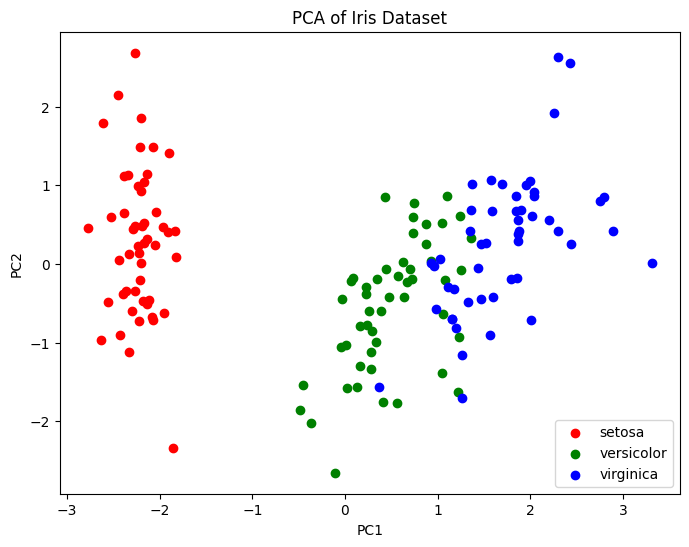

In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and standardize the dataset
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)

# Apply PCA and plot
X_pca = PCA(n_components=2).fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = iris.target

# Plot
plt.figure(figsize=(8, 6))
for target, color in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(df_pca[df_pca['Target'] == target]['PC1'],
                df_pca[df_pca['Target'] == target]['PC2'], c=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.legend(iris.target_names)
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

# Synthetic dataset
data = {
    'User': ['User1', 'User2', 'User3', 'User4', 'User5'],
    'Item1': [5, 3, 4, np.nan, 2],
    'Item2': [3, 2, 4, 4, 5],
    'Item3': [4, 4, 3, 2, np.nan],
    'Item4': [2, 5, 3, 4, 1],
    'Item5': [3, 4, np.nan, 5, 4],
    'Item6': [5, 4, 2, 3, 4],
}

# Step 1: Create DataFrame and fill missing values
df = pd.DataFrame(data)
df.set_index('User', inplace=True)
df_filled = df.fillna(0)

# Step 2: Center the data by subtracting user mean
user_means = df_filled.mean(axis=1)
df_centered = df_filled.sub(user_means, axis=0)

# Step 3: Apply SVD
svd = TruncatedSVD(n_components=2)
U = svd.fit_transform(df_centered)
Sigma = np.diag(svd.singular_values_)
Vt = svd.components_

# Step 4: Reconstruct ratings and add user means back
reconstructed = np.dot(np.dot(U, Sigma), Vt) + user_means.values[:, np.newaxis]
reconstructed_df = pd.DataFrame(reconstructed, columns=df.columns, index=df.index)

# Step 5: Scale ratings to range [1, 5]
scaler = MinMaxScaler(feature_range=(1, 5))
reconstructed_scaled = pd.DataFrame(
    scaler.fit_transform(reconstructed_df), columns=df.columns, index=df.index
)

# Step 6: Recommend items
def recommend_items(user, ratings_df, n_recommendations=3):
    user_ratings = ratings_df.loc[user]
    return user_ratings.sort_values(ascending=False).head(n_recommendations)

# Get recommendations for a specific user
user = 'User5'
recommendations = recommend_items(user, reconstructed_scaled)
print(f"Recommended items for {user}:\n{recommendations}")


Recommended items for User5:
Item2    5.000000
Item6    5.000000
Item5    4.013128
Name: User5, dtype: float64
